<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descenso-de-gradiente-para-modelos-de-regresión-lineal-por-OLS" data-toc-modified-id="Descenso-de-gradiente-para-modelos-de-regresión-lineal-por-OLS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descenso de gradiente para modelos de regresión lineal por OLS</a></span><ul class="toc-item"><li><span><a href="#Preparación-de-los-datos" data-toc-modified-id="Preparación-de-los-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparación de los datos</a></span></li><li><span><a href="#Aprendizaje-del-modelo" data-toc-modified-id="Aprendizaje-del-modelo-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aprendizaje del modelo</a></span></li><li><span><a href="#Significancia-de-los-parámetros-del-modelo" data-toc-modified-id="Significancia-de-los-parámetros-del-modelo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Significancia de los parámetros del modelo</a></span></li><li><span><a href="#Obtención-de-los-parámetros-a-partir-de-Gradient-Descent" data-toc-modified-id="Obtención-de-los-parámetros-a-partir-de-Gradient-Descent-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Obtención de los parámetros a partir de Gradient Descent</a></span></li></ul></li></ul></div>

# Descenso de gradiente para modelos de regresión lineal por OLS

## Preparación de los datos

Se importan las librerías que se van a utilizar:
- **numpy**: librería numérica que proporciona todo tipo de operaciones matemáticas y de algebra lineal. Vamos a utilizar el random y operaciones sobre arrays y matrices
- **matplotlib**: permite crear gráficos 2D, con algunas pocas funcionalidades 3D
- **sklearn**: librería para machine learning en Python (scikit-learn), incluye modelos de clasificación, regresión, clustering, y herramientas de reducción de dimensionalidad, selección de modelos y preprocesamiento
- **statsmodels**: librería de métodos y algoritmos estadísticos
- **scipy**: librería que integra paquetes utilizados en computación scientífica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Vamos a especificar un valor de la semilla a utilizar para el generador de números pseudo aleatorio

In [22]:
np.random.seed(123456)

Vamos a crear un set de datos sintéticos: un array de 5000 filas y 1 columna con valores aleatorios, que servirán como variables predictoras del modelo de regresión: Y= w1\*x1 + w0

In [3]:
x = np.random.random(5000)
print("x tiene un tamaño de: ", len(x))
print("x tiene un shape de: ", x.shape)
print("las primeras 5 filas de x son: \n", x[0:5])

x tiene un tamaño de:  5000
x tiene un shape de:  (5000,)
las primeras 5 filas de x son: 
 [0.04438376 0.39849151 0.06885986 0.60812856 0.61102978]


Generamos los Y (la variable objetivo) a partir de una combinación lineal 
- del predictor X1,
- de los parámetros w0 (sesgo/bias) y w1 (coeficiente de la variable independiente) con valores de 2 y 4 respectivamente, 
- introduciendo un poco de ruido aleatorio siguiendo una distribución estándar (queda en el vector epsilon) para que un modelo de regresión no sea perfecto.

In [5]:
w0 = 2
w1 = 4

In [6]:
epsilon = 0.5*np.random.normal(0, 1, 5000)
y = x*w1 + w0 + epsilon
print(y.size)
print(y.shape)
print(y[0:5])

5000
(5000,)
[2.11114375 3.3490678  0.96570842 4.19191739 4.87145676]


Visualicemos los datos generados.

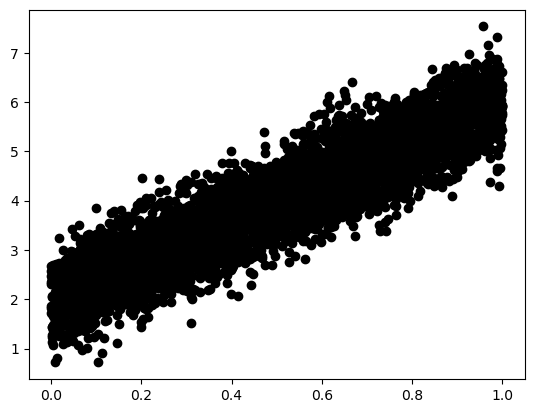

In [7]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.show()


## Aprendizaje del modelo

Ahora vamos a aprender un modelo de regresión con scikit-learn como **si no conocieramos los parámetros** reales w0 y w1.
El modelo es un objeto y ofrece diferentes métodos. Obtenemos los resultados para analizar su calidad.

Se crea el modelo de regresión lineal y se entrena con los datos de las variables independientes y dependiente

In [8]:
modelo = linear_model.LinearRegression()
modelo.fit(np.expand_dims(x, axis=1), y)

LinearRegression()

In [9]:
x

array([0.04438376, 0.39849151, 0.06885986, ..., 0.6067619 , 0.98551623,
       0.4476684 ])

In [10]:
np.expand_dims(x, axis=1)

array([[0.04438376],
       [0.39849151],
       [0.06885986],
       ...,
       [0.6067619 ],
       [0.98551623],
       [0.4476684 ]])

Podemos utilizar el modelo para predecir sobre los mismos datos originales (en la vida real esto no se debe hacer, pues se estaría subestimando el error real dado el sobre aprendizaje)

In [11]:
y_pred = modelo.predict(np.expand_dims(x, axis=1))
print(y_pred.shape)
print("Predichos: ", y_pred[0:10])
print("Reales:    ", y[0:10])

(5000,)
Predichos:  [2.17343012 3.59077269 2.27139751 4.4298606  4.44147292 5.81365421
 3.85573208 3.27198946 3.26819882 5.74450405]
Reales:     [2.11114375 3.3490678  0.96570842 4.19191739 4.87145676 5.72638269
 4.18918941 3.45463404 3.31344737 5.85549936]


Podemos obtener los coeficientes resultados de la regresión, así como métricas de calidad de ajuste del modelo.

In [12]:
params = np.append(modelo.intercept_, modelo.coef_)
print('Coefficients: \n', params)
print("Mean squared error: %.8f" %mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('Variance score (R2): %.8f' %r2_score(y, y_pred))

r2_adjusted = 1 - (1-r2)*(len(y)-1) / (len(y) - 1 - 1)
print('R2 adjusted: %.8f' %r2_adjusted)

Coefficients: 
 [1.9957808  4.00257437]
Mean squared error: 0.26020434
Variance score (R2): 0.83600038
R2 adjusted: 0.83596756


**Nota al margen:** Aunque en este caso no aplica, mostramos como se calcula el R2 ajustado (no disponible en scikit-learn), una modificación del R2 que penaliza el número de parámetros utilizados que se utilizaría para comparar modelos con diferente número de parámetros. Al agregar más predictores a un modelo, el R2 siempre aumenta, así las variables agregadas no estén realmente correlacionadas con la variable objetivo. El R2 ajustado corrige ese sesgo en la medida de calidad del ajuste.

## Significancia de los parámetros del modelo

Usamos el package statsmodels para poder analizar los coeficientes de regresión (scikit-learn no incluye los betas!!) .
Si queremos el coeficiente del intercepto con statsmodels, es necesario adicionar una constante inicial a los datos predictores

In [13]:
x2 = sm.add_constant(x)
print(x2[0:10])

[[1.         0.04438376]
 [1.         0.39849151]
 [1.         0.06885986]
 [1.         0.60812856]
 [1.         0.61102978]
 [1.         0.95385446]
 [1.         0.46468875]
 [1.         0.31884696]
 [1.         0.31789991]
 [1.         0.93657804]]


In [14]:
modeloStats = sm.OLS(y, x2)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 2.548e+04
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:32:30   Log-Likelihood:                -3729.0
No. Observations:                5000   AIC:                             7462.
Df Residuals:                    4998   BIC:                             7475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9958      0.014    137.776      0.000       1.967       2.024
x1             4.0026      0.025    159.617      0.000       3.953       4.052
==============================================================================
Omnibus:                        7.460   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.496
Skew:                          -0.022   Prob(JB):                       0.0388
Kurtosis:                       2.829   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que el coeficiente asociado a x1 es significativo, al tener un valor p cercano a 0.

## Obtención de los parámetros a partir de Gradient Descent

Vamos a definir una función que nos permitirá ejecutar un paso de descenso de gradiente utilizando numpy.

Partimos de la función de costo que considera la regresión con 1 parámetro:

$𝐽(w_0,w_1,\textbf{𝑥}_1,\textbf{y}_1)=\frac{1}{2𝑚} ∑_{𝑖=1}^{𝑚}(w_0+w_1*𝑥_1^{(𝑖)}−𝑦^{(𝑖)})^2 $

Y para cada coeficiente calculamos el gradiente correspondiente:
- $gradiente_{w_0} = \frac{1}{m} ∑_{i=1}^𝑚(w_0+w_1*𝑥_1^{(i)}−𝑦^{(i)})$
- $gradiente_{w_1} = \frac{1}{m} ∑_{i=1}^𝑚(w_0+w_1*𝑥_1^{(i)}−𝑦^{(i)})*𝑥_1^{(i)}$


Tareas a desarrollar:

- **funcionDeCosto(w0_actual, w1_actual, arrayX, arrayY)**: función que calcula el costo de utilizar los parámetros w0 y w1 para predecir los valores de la variable dependiente Y a partir de X. Se trata del $𝐽(w_0,w_1)$ definido más arriba.
- **pasoDescensoGradiente(w0_actual, w1_actual, arrayX, arrayY, learningRate)**: función que calcula un paso de descenso de gradiente. Retorna una lista (w0_modificado, w1_modificado)
- **cicloDescensoGradiente(epocas, learningRate)**: función que inicializa los parámetros w0 y w1 e itera el número de pocas determinadas, ejecutando cada vez un paso de descenso de gradiente con el learningRate dado. Retorna los valores finales de w0 y w1.

In [15]:
def funcionDeCosto(w0_actual, w1_actual, arrayX, arrayY):
    """Calcula el valor de la función de costo de una regresión lineal simple con los parámetros w0 y w1.
    Retorna: 
    error: el valor de la función de costo inicial

    Argumentos:
    w0_actual -- el valor actual del coeficiente de la intersección 
    w1_actual -- el valor actual del coeficiente asociado al predictor
    arrayX -- array con los valores del predictor X de todas las instancias
    arrayY -- array con los valores de la variable objetivo Y de todas las instancias
    """

    # Vamos a recorrer todos los puntos y a acumular el error cuadrático (el costo aportado por cada punto)
    error = 0
    m = len(arrayX)
    for i in range(0, m): # Se recorren los puntos
#        print("    error=", error)
        x = arrayX[i]
        y = arrayY[i]
        errorPunto = (w0_actual + w1_actual*x - y)**2
        error+=errorPunto
    # El error total lo dividimos por 2*m
    return error / (2*m)

In [16]:
def gradientDescent(w0_actual, w1_actual, arrayX, arrayY, learningRate):
    """Calcula la actualización de un paso de gradient descent para los coeficientes de una
    regresión lineal simple (un predictor).
    Retorna una lista con tres posiciones: 
    w0_modificado: el valor modificado del coeficiente de la intersección después del paso de gradiente
    w1_modificado: el valor actual del coeficiente asociado al predictor después del paso de gradiente
    costo: el valor de la función de costo para la iteración actual

    Argumentos:
    w0_actual -- el valor actual del coeficiente de la intersección 
    w1_actual -- el valor actual del coeficiente asociado al predictor
    arrayX -- array con los valores del predictor X de todas las instancias
    arrayY -- array con los valores de la variable objetivo Y de todas las instancias
    learningRate -- tasa de aprendizaje para el paso de descenso de gradiente calculado 
    """
    costo = funcionDeCosto(w0_actual, w1_actual, arrayX, arrayY)

    #Vamos ahora a calcular el gradiente de cada parámetro, acumulandolo con cada iteración
    m = len(arrayX)
    gradW0 = 0
    gradW1 = 0
    for i in range(0, m): # Se recorren los puntos
        x = arrayX[i]
        y = arrayY[i]
        gradW0 += (w0_actual + w1_actual*x - y)
        gradW1 += (w0_actual + w1_actual*x - y)*x
    gradW0 = gradW0 / m
    gradW1 = gradW1 / m

    # Ahora actualizamos los valores actuales y los retornamos
    w0_modificado = w0_actual - learningRate*gradW0
    w1_modificado = w1_actual - learningRate*gradW1
    
    return [w0_modificado, w1_modificado, costo]

Ahora vamos a llamar la función que acabamos de definir tantas veces como épocas o iteraciones queramos, para obtener los valores de los parámetros.

In [17]:
# Hiperparámetros del algoritmo de gradient descent
learningRate = 0.1
epocas = 1000

# Definimos los valores iniciales de los coeficientes
w0 = 0
w1 = 0

#Vamos a iterar sobre las épocas llamando cada vez a un nuevo paso de gradient descent
w0s = []
w1s = []
costos = []
for i in range(epocas):
    [w0, w1, costo] = gradientDescent(w0, w1, np.array(x), np.array(y), learningRate)
    costos.append(costo)
    w0s.append(w0)
    w1s.append(w1)
    #print("w0={:f} w1={:f} costo={:f}".format(w0, w1, costo))
print("Valores finales: w0={:f} w1={:f} costo={:f}".format(w0, w1, costo))

Valores finales: w0=1.997529 w1=3.999311 costo=0.130103


Text(0, 0.5, 'costo')

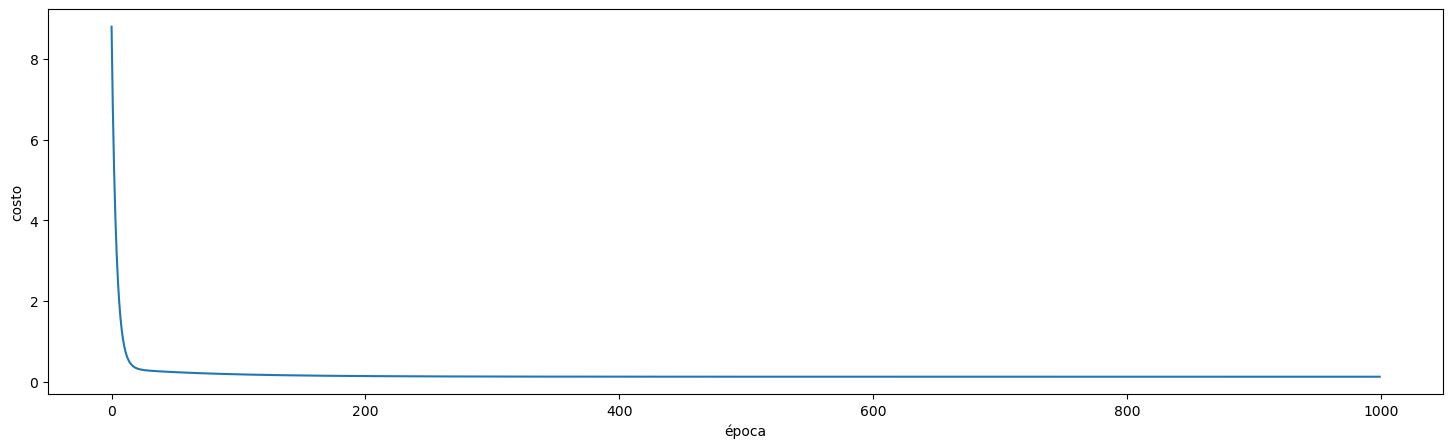

In [18]:
fig = plt.figure(figsize=(18,5))
plt.plot(costos)
plt.xlabel("época")
plt.ylabel("costo")


Los coeficientes de regresión encontrados con el modelo de regresión de scikit-learn y statsmodels fueron muy parecidos que con el gradient descent, aunque no fueron perfectos.
Es necesario ensayar con diferentes valores del learning rate. Los resultados que obtuvimos se produjeron con un learning rate de 0.1 y 1000 iteraciones.
Es posible que con más puntos nos hubieramos acercado más a los coeficientes reales.

Podemos utilizar diferentes configuraciones del learning rate para entender su influencia.
Por ejemplo, **intenten con valores de 0.0001 y 10**.

Text(0, 0.5, 'costo')

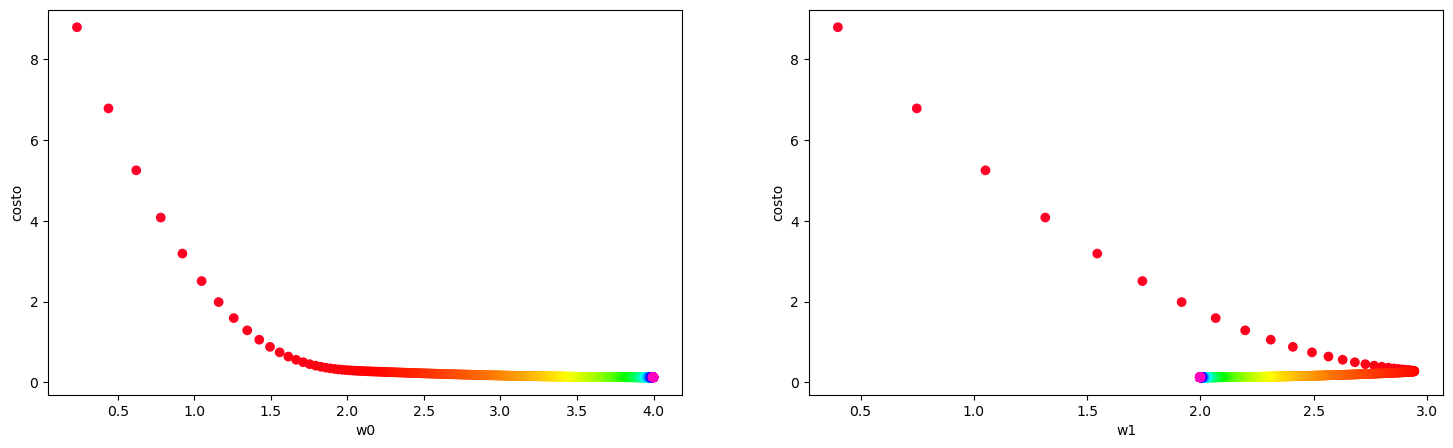

In [19]:
fig = plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.scatter(w1s, costos, c=range(0, epocas), cmap="gist_rainbow")
plt.xlabel("w0")
plt.ylabel("costo")

plt.subplot(1, 2, 2)
plt.scatter(w0s, costos, c=range(0, epocas), cmap="gist_rainbow")
plt.xlabel("w1")
plt.ylabel("costo")
